In [1]:
import pandas as pd
import seaborn as sbn
import numpy as np
from matplotlib import pyplot as plt

#### Reading dataset

In [2]:
df = pd.read_csv("dataset_covid_manaus.csv", delimiter = ';', encoding = 'ISO-8859-1', low_memory=False)

In [3]:
df.sample(10)

,_idade,_faixa etária,_sexo,_bairro,_classificacao,_comorb_renal,_comorb_diabetes,_comorb_imuno,_comorb_cardio,_conclusao,...,_distrito,_bairro_mapa,_comorb_respiratoria,_comorb_cromossomica,_comorb_hepatica,_comorb_neurologica,_comorb_hemato,_comorb_obessidade,_origem,_evolução
83058,75.0,70a - 79a,F,TARUMA,Em análise,Não,Não,Não,Não,Recuperado,...,OESTE,TARUMÃ,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",Em tratamento domiciliar
75606,40.0,40a - 49a,F,PONTA NEGRA,Descartado,Não,Não,Não,Não,Recuperado,...,OESTE,PONTA NEGRA,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
48254,63.0,60a - 69a,M,CIDADE NOVA,Descartado,Não,Não,Não,Não,NaN,...,NORTE,CIDADE NOVA,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
56874,38.0,30a - 39a,M,NOVA CIDADE,Descartado,Não,Não,Não,Não,NaN,...,NORTE,NOVA CIDADE,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
84438,20.0,20a - 29a,M,REDENCAO,Em análise,Não,Não,Não,Não,NaN,...,OESTE,REDENÇÃO,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",Em tratamento domiciliar
61678,65.0,60a - 69a,M,TANCREDO NEVES,Descartado,Não,Não,Não,Não,NaN,...,LESTE,TANCREDO NEVES,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
54916,41.0,40a - 49a,M,NOVO ALEIXO,Descartado,Não,Não,Não,Não,NaN,...,NORTE,NOVO ALEIXO,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
64306,48.0,40a - 49a,F,ZUMBI DOS PALMARES 2,Confirmado,Não,Sim,Não,Não,NaN,...,LESTE,ZUMBI DOS PALMARES,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
22906,46.0,40a - 49a,F,BEIJA FLOR 2,Em análise,Não,Não,Não,Não,Recuperado,...,SUL,FLORES,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN
18822,29.0,20a - 29a,F,JAPIIM,Descartado,Não,Não,Não,Não,Recuperado,...,SUL,JAPIIM,Não,Não,NaN,NaN,NaN,NaN,"eSUS VE,",NaN


#### 2.1.1 How many attributes per row? Which are its names?

In [4]:
df.columns

Index(['_idade', '_faixa etária', '_sexo', '_bairro', '_classificacao',
       '_comorb_renal', '_comorb_diabetes', '_comorb_imuno', '_comorb_cardio',
       '_conclusao', '_dt_notificacao', '_taxa', '_dt_evolucao', '_raca',
       '_dt_sintomas', '_criterio', '_tipo_teste', '_sintoma_garganta',
       '_sintoma_dispneia', '_sintoma_febre', '_sintoma_tosse',
       '_sintoma_outros', '_etnia', '_profiss_saude', '_srag',
       '_se_notificacao', '_distrito', '_bairro_mapa', '_comorb_respiratoria',
       '_comorb_cromossomica', '_comorb_hepatica', '_comorb_neurologica',
       '_comorb_hemato', '_comorb_obessidade', '_origem', '_evolução'],
      dtype='object')

In [5]:
print(len(df.columns))

36


#### 2.1.2 How many confirmed cases are show in the table?

In [6]:
df[df._classificacao == 'Confirmado'].shape[0]

36947

#### 2.1.3 What is the oldest case. And the newest?

In [7]:
df['_dt_notificacao']

0         04/05/2020
1         01/05/2020
2         04/05/2020
3         04/05/2020
4         04/05/2020
             ...    
108346    01/06/2020
108347    25/05/2020
108348    04/05/2020
108349    05/06/2020
108350    03/04/2020
Name: _dt_notificacao, Length: 108351, dtype: object

In [8]:
sorted_dates = np.array(df['_dt_notificacao'].sort_values(na_position='first'))

In [9]:
sorted_dates_no_nan = np.array([e for e in sorted_dates if pd.isnull(e) is False])

In [10]:
sorted_dates_no_nan[0]

'01/03/2020'

In [11]:
sorted_dates_no_nan[len(sorted_dates_no_nan)-1]

'31/07/2020'

#### Deleting rows and columns which are not useful for our purposes

In [12]:
attributes_we_want = ['_idade', '_sexo', '_bairro', '_classificacao', '_dt_notificacao', '_tipo_teste', '_conclusao']

In [13]:
supp = []

for a in list(df.columns):
    if a in attributes_we_want:
        continue
    else:
        supp.append(a)
        
print(supp)

['_faixa etária', '_comorb_renal', '_comorb_diabetes', '_comorb_imuno', '_comorb_cardio', '_taxa', '_dt_evolucao', '_raca', '_dt_sintomas', '_criterio', '_sintoma_garganta', '_sintoma_dispneia', '_sintoma_febre', '_sintoma_tosse', '_sintoma_outros', '_etnia', '_profiss_saude', '_srag', '_se_notificacao', '_distrito', '_bairro_mapa', '_comorb_respiratoria', '_comorb_cromossomica', '_comorb_hepatica', '_comorb_neurologica', '_comorb_hemato', '_comorb_obessidade', '_origem', '_evolução']


In [14]:
clean_df = df.drop(supp, axis=1)

In [15]:
clean_df.head()

,_idade,_sexo,_bairro,_classificacao,_conclusao,_dt_notificacao,_tipo_teste
0,37.0,F,CONJ. CIDADAO 10,Confirmado,NaN,04/05/2020,TESTE RÁPIDO - ANTÍGENO
1,46.0,F,MORADA DO SOL,Descartado,Recuperado,01/05/2020,TESTE RÁPIDO - ANTÍGENO
2,51.0,F,NaN,Confirmado,NaN,04/05/2020,TESTE RÁPIDO - ANTICORPO
3,74.0,M,NaN,Confirmado,NaN,04/05/2020,TESTE RÁPIDO - ANTICORPO
4,51.0,F,ALEIXO,Confirmado,NaN,04/05/2020,TESTE RÁPIDO - ANTICORPO


#### Before we drop NaN values, let's analyse this middle result dataframe

In [17]:
clean_df['_idade'].describe()

count    108230.000000
mean         41.035267
std          16.883549
min           0.000000
25%          30.000000
50%          40.000000
75%          51.000000
max         388.000000
Name: _idade, dtype: float64

In [18]:
clean_df['_conclusao'].describe()

count          64812
unique             2
top       Recuperado
freq           61319
Name: _conclusao, dtype: object

In [21]:
clean_df['_bairro'].describe()

count          106223
unique           3424
top       CIDADE NOVA
freq             5984
Name: _bairro, dtype: object

In [27]:
list_nan = [0, 0, 0, 0, 0, 0, 0]
dict_nan = dict(zip(attributes_we_want, list_nan))

for a in attributes_we_want:
    dict_nan[a] = clean_df[a].isnull().sum()

print(f"Counting NaN values of DF columns: {dict_nan}")

Counting NaN values of DF columns: {'_idade': 121, '_sexo': 800, '_bairro': 2128, '_classificacao': 0, '_dt_notificacao': 11, '_tipo_teste': 35851, '_conclusao': 43539}


#### There are many many NaN values on both _tipo_teste_ and _conclusao_ columns. This would lead to a poor DF, so we need to work with them separately. Also, the instructions paper tell us to use only confirmed cases.

In [43]:
df_no_tt = clean_df.drop(['_tipo_teste'], axis=1)
df_no_tt = df_no_tt[df_no_tt._classificacao == 'Confirmado']
df_no_tt = df_no_tt.dropna()
df_no_tt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6422 entries, 680 to 108349
Data columns (total 6 columns):
_idade             6422 non-null float64
_sexo              6422 non-null object
_bairro            6422 non-null object
_classificacao     6422 non-null object
_conclusao         6422 non-null object
_dt_notificacao    6422 non-null object
dtypes: float64(1), object(5)
memory usage: 351.2+ KB


In [44]:
df_no_cc = clean_df.drop(['_conclusao'], axis=1)
df_no_cc = df_no_cc[df_no_cc._classificacao == 'Confirmado']
df_no_cc = df_no_cc.dropna()
df_no_cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6422 entries, 680 to 108349
Data columns (total 6 columns):
_idade             6422 non-null float64
_sexo              6422 non-null object
_bairro            6422 non-null object
_classificacao     6422 non-null object
_dt_notificacao    6422 non-null object
_tipo_teste        6422 non-null object
dtypes: float64(1), object(5)
memory usage: 351.2+ KB


In [45]:
# dropping NaN with both _conclusao and _tipo_teste
clean_df = clean_df[clean_df._classificacao == 'Confirmado']
clean_df = clean_df.dropna()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6422 entries, 680 to 108349
Data columns (total 7 columns):
_idade             6422 non-null float64
_sexo              6422 non-null object
_bairro            6422 non-null object
_classificacao     6422 non-null object
_conclusao         6422 non-null object
_dt_notificacao    6422 non-null object
_tipo_teste        6422 non-null object
dtypes: float64(1), object(6)
memory usage: 401.4+ KB


#### 2.1.1 How many rows and columns last after cleaning?

In [46]:
clean_df.shape

(6422, 7)

#### 2.1.2 How many recovered people in percentage?

In [47]:
rec_series = df_no_tt[df_no_tt._conclusao == 'Recuperado']
rec = len(rec_series)
total = df_no_tt.shape[0]
ans = rec/total * 100.0
print(ans)

99.79757085020243


#### 2.1.3 Which genre had most confirmed cases?

In [48]:
conf_cases = clean_df[clean_df._classificacao == 'Confirmado']

male = conf_cases[conf_cases._sexo == 'M']
fale = conf_cases[conf_cases._sexo == 'F']

print(f"Female cases: {len(fale)}")
print(f"Male cases: {len(male)}")

Female cases: 3645
Male cases: 2777


#### 2.1.4 What is the youngest and oldest person who had a confirmed case? What is the mean and standard deviation of all confirmed cases?

In [49]:
ages = np.sort(conf_cases._idade)
print(f"Yougest: {ages[0]}")
print(f"Oldest: {ages[len(ages)-1]}")

Yougest: 0.0
Oldest: 99.0


In [50]:
print(f"Mean: {np.mean(ages)}")

Mean: 41.433821239489255


In [51]:
print(f"Std: {np.std(ages)}")

Std: 14.155360848072508


#### 2.1.5 Which neighbourhood had more confirmed cases?

In [52]:
neigh_cases = conf_cases.groupby('_bairro')['_classificacao'].count()

In [53]:
neigh_cases.sort_values(ascending=False)

_bairro
CIDADE NOVA            301
FLORES                 266
TARUMA                 225
PETROPOLIS             193
ALEIXO                 172
                      ... 
PAQUE 10                 1
PAR DAS LARANJEIRA       1
PARQ. DEZ DE NOVEMB      1
PARQ. LARANJEIRAS        1
ADRIANOPOLES             1
Name: _classificacao, Length: 506, dtype: int64

#### 2.1.6 Which are top 3 neibourhood that had more recovered cases?

In [54]:
neigh_cases_rec = conf_cases.groupby(['_bairro', '_conclusao'])['_classificacao'].count()

In [55]:
neigh_cases_rec.sort_values(ascending=False)

_bairro              _conclusao
CIDADE NOVA          Recuperado    301
FLORES               Recuperado    266
TARUMA               Recuperado    225
PETROPOLIS           Recuperado    192
ALEIXO               Recuperado    171
                                  ... 
PAQUE 10             Recuperado      1
PAR DAS LARANJEIRA   Recuperado      1
PARQ. DEZ DE NOVEMB  Recuperado      1
PARQ. LARANJEIRAS    Recuperado      1
ADRIANOPOLES         Recuperado      1
Name: _classificacao, Length: 516, dtype: int64

#### 2.1.7 What is the test applied types by name? Display the absolute and percetage values.

In [56]:
test_types = clean_df.groupby('_tipo_teste')['_tipo_teste'].count()

In [57]:
test_types

_tipo_teste
ECLIA IgG                      4
ELISA IgM                      6
RT-PCR                      1537
TESTE RÁPIDO - ANTICORPO    3736
TESTE RÁPIDO - ANTÍGENO     1139
Name: _tipo_teste, dtype: int64

In [58]:
total_tests = np.sum(test_types)
test_name = ['ECLIA IgG', 'ELISA IgM', 'RT-PCR', 'TESTE RÁPIDO - ANTICORPO', 'TESTE RÁPIDO - ANTÍGENO']

In [59]:
perc_test = [(t/total_tests * 100) for t in test_types]

In [60]:
arrado = np.array([test_name, test_types, perc_test])
arrado = arrado.transpose()

In [61]:
pd.DataFrame(arrado, columns=['test_name', 'abs values', 'perc (%) values'])

,test_name,abs values,perc (%) values
0,ECLIA IgG,4,0.06228589224540642
1,ELISA IgM,6,0.09342883836810963
2,RT-PCR,1537,23.933354095297414
3,TESTE RÁPIDO - ANTICORPO,3736,58.17502335720959
4,TESTE RÁPIDO - ANTÍGENO,1139,17.735907816879475


#### 2.1.8 What is death rate?

In [62]:
deaths = conf_cases[conf_cases._conclusao == 'Óbito'].count()
total = conf_cases.count()

In [63]:
deaths[0]/total[0] * 100.0

0.20242914979757085

#### 2.1.9 What is the Pearson correlation between age and number os cases?

In [64]:
age_cases = conf_cases.groupby(['_idade']).count()

In [65]:
age_cases.head(10)

,_sexo,_bairro,_classificacao,_conclusao,_dt_notificacao,_tipo_teste
_idade,,,,,,
0.0,48,48,48,48,48,48
1.0,19,19,19,19,19,19
2.0,11,11,11,11,11,11
3.0,14,14,14,14,14,14
4.0,10,10,10,10,10,10
5.0,11,11,11,11,11,11
6.0,6,6,6,6,6,6
7.0,11,11,11,11,11,11
8.0,5,5,5,5,5,5


In [66]:
age_cases.index

Float64Index([ 0.0,  1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0,
              11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0,
              22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0,
              33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0,
              44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0,
              55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0,
              66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0,
              77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0,
              88.0, 89.0, 90.0, 92.0, 93.0, 94.0, 96.0, 97.0, 99.0],
             dtype='float64', name='_idade')

In [67]:
age_cases.values.transpose()[0]

array([ 48,  19,  11,  14,  10,  11,   6,  11,   5,   6,   8,   5,   9,
        12,  15,  14,  15,  27,  26,  16,  43,  50,  55,  70,  92, 112,
        95, 114, 134, 126, 123, 145, 155, 149, 149, 170, 179, 185, 213,
       213, 215, 205, 202, 198, 196, 192, 212, 170, 169, 141, 143, 119,
       128, 135, 113, 108,  92,  92,  76,  68,  64,  49,  49,  50,  32,
        43,  33,  31,  24,  22,  20,  19,  17,  14,   8,  12,  15,   7,
        10,   6,   8,  10,   8,   2,   7,   5,   4,   4,   3,   4,   1,
         2,   1,   1,   1,   1,   1], dtype=int64)

In [68]:
age_case_corr = pd.DataFrame(data=np.array([age_cases.index, age_cases.values.transpose()[0]]).transpose(), columns=['idade', 'casos'])

In [69]:
age_case_corr['idade'].corr(age_case_corr['casos'])

-0.2258984278924331

In [70]:
# O resultado é um valor negativo próximo de zero.
# Isso demonstra que as variáveis possuem uma leve relação inversamente proporcional.

#### 2.2.1 Plot a histogram of top 10 cases number by districts. The remaning districts must be in a bar denoted by "others". The information must be in percentages.

In [71]:
neigh_cases.sort_values(ascending=False).head(10)

_bairro
CIDADE NOVA          301
FLORES               266
TARUMA               225
PETROPOLIS           193
ALEIXO               172
NOVO ALEIXO          170
JORGE TEIXEIRA       169
SAO JOSE OPERARIO    169
COROADO              168
COMPENSA             166
Name: _classificacao, dtype: int64

In [72]:
hist = list(neigh_cases.sort_values(ascending=False).head(10))
print(hist)

[301, 266, 225, 193, 172, 170, 169, 169, 168, 166]


In [73]:
nbs = ['CN', 'FL', 'TA', 'PT', 'AL', 'NAL', 'JT', 'SJO', 'COR', 'COM', 'Others']

In [74]:
others = np.sum(neigh_cases.sort_values(ascending=False).tail(496))
print(others)

4423


In [75]:
hist.append(others)
print(hist)

[301, 266, 225, 193, 172, 170, 169, 169, 168, 166, 4423]


In [76]:
total = sum(hist)
print(total)

6422


Text(0.5, 1.0, 'Distribution of confirmed cases per district')

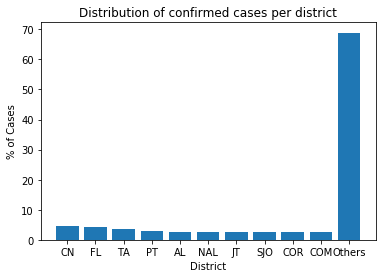

In [77]:
plt.bar(nbs, [x/total * 100 for x in hist])
plt.xlabel("District")
plt.ylabel("% of Cases")
plt.title("Distribution of confirmed cases per district")

#### 2.2.2 Plot a boxplot of ages of confirmed cases per genre. Is there any outlier?

In [78]:
male_age = conf_cases[conf_cases._sexo == 'M'][['_idade']]
fale_age = conf_cases[conf_cases._sexo == 'F'][['_idade']]

In [79]:
male_age = male_age.values.flatten()
fale_age = fale_age.values.flatten()

In [80]:
data = np.concatenate((male_age, fale_age))

{'whiskers': [<matplotlib.lines.Line2D at 0x1d9c39cfec8>,
 'caps': [<matplotlib.lines.Line2D at 0x1d9c39a7ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d9c39cfc08>,
 'medians': [<matplotlib.lines.Line2D at 0x1d9c12b52c8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d9c35d0888>,
 'means': []}

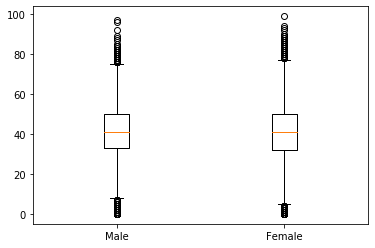

In [81]:
plt.boxplot((male_age, fale_age), sym="o", labels=["Male", "Female"])

#### 2.2.3 Plot the number of new cases per day (on the last 10 days).

In [82]:
clean_df

,_idade,_sexo,_bairro,_classificacao,_conclusao,_dt_notificacao,_tipo_teste
680,25.0,F,ADRIANOPOLIS,Confirmado,Recuperado,20/03/2020,RT-PCR
681,41.0,F,BETANIA,Confirmado,Recuperado,27/03/2020,RT-PCR
67519,40.0,F,DOM PEDRO,Confirmado,Recuperado,20/04/2020,TESTE RÁPIDO - ANTICORPO
67523,50.0,M,FLORES,Confirmado,Recuperado,24/04/2020,RT-PCR
67540,30.0,M,PRESIDENTE VARGAS,Confirmado,Recuperado,23/04/2020,TESTE RÁPIDO - ANTÍGENO
...,...,...,...,...,...,...,...
108310,70.0,F,DOM PEDRO I,Confirmado,Recuperado,02/06/2020,TESTE RÁPIDO - ANTÍGENO
108338,0.0,M,NOVO ALEIXO,Confirmado,Recuperado,28/06/2020,TESTE RÁPIDO - ANTICORPO
108341,14.0,F,DA PAZ,Confirmado,Recuperado,25/06/2020,TESTE RÁPIDO - ANTÍGENO
108346,68.0,M,JORGE TEIXEIRA,Confirmado,Recuperado,01/06/2020,RT-PCR


In [83]:
cases_per_day = clean_df.drop(columns=['_idade', '_sexo', '_bairro', '_conclusao', '_tipo_teste'])

In [84]:
cases_per_day.head(20)

,_classificacao,_dt_notificacao
680,Confirmado,20/03/2020
681,Confirmado,27/03/2020
67519,Confirmado,20/04/2020
67523,Confirmado,24/04/2020
67540,Confirmado,23/04/2020
67545,Confirmado,21/04/2020
67550,Confirmado,11/04/2020
67551,Confirmado,24/04/2020
67554,Confirmado,24/04/2020
67555,Confirmado,24/04/2020


In [85]:
cases_per_day['_dt_notificacao'] = pd.to_datetime(cases_per_day['_dt_notificacao'], dayfirst=True)

In [86]:
cases_per_day

,_classificacao,_dt_notificacao
680,Confirmado,2020-03-20
681,Confirmado,2020-03-27
67519,Confirmado,2020-04-20
67523,Confirmado,2020-04-24
67540,Confirmado,2020-04-23
...,...,...
108310,Confirmado,2020-06-02
108338,Confirmado,2020-06-28
108341,Confirmado,2020-06-25
108346,Confirmado,2020-06-01


In [87]:
porra = 0
for i in cases_per_day._dt_notificacao.dt.month:
    if i == 2:
        porra += 1
print(porra)

1


In [88]:
cases_per_day

,_classificacao,_dt_notificacao
680,Confirmado,2020-03-20
681,Confirmado,2020-03-27
67519,Confirmado,2020-04-20
67523,Confirmado,2020-04-24
67540,Confirmado,2020-04-23
...,...,...
108310,Confirmado,2020-06-02
108338,Confirmado,2020-06-28
108341,Confirmado,2020-06-25
108346,Confirmado,2020-06-01


In [89]:
caralhos = cases_per_day.sort_values(by='_dt_notificacao')

In [90]:
caralhos

,_classificacao,_dt_notificacao
107318,Confirmado,2020-01-30
77211,Confirmado,2020-02-16
89016,Confirmado,2020-03-09
68700,Confirmado,2020-03-13
75419,Confirmado,2020-03-14
...,...,...
108042,Confirmado,2020-07-20
107433,Confirmado,2020-07-24
108123,Confirmado,2020-07-24
107461,Confirmado,2020-07-30


In [91]:
days_group = caralhos.groupby('_dt_notificacao').count()

In [92]:
days_group.tail(20)

,_classificacao
_dt_notificacao,
2020-06-22,87
2020-06-23,45
2020-06-24,45
2020-06-25,71
2020-06-26,54
2020-06-27,4
2020-06-28,6
2020-06-29,83
2020-06-30,89


In [93]:
bar_days = days_group.tail(17).values

In [94]:
bar_days = bar_days.flatten()

In [95]:
bar_days

array([71, 54,  4,  6, 83, 89, 45, 38, 29,  6,  9, 32,  1,  1,  2,  1,  1],
      dtype=int64)

In [96]:
bar_days = np.delete(bar_days, [i for i in range(10,17)])

In [97]:
days = ['2020-06-27', '2020-06-28', '2020-06-29', '2020-06-30', '2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06']

In [98]:
bar_days = list(bar_days)

In [99]:
bar_days

[71, 54, 4, 6, 83, 89, 45, 38, 29, 6]

In [100]:
diff = []

for i in range(1, len(bar_days)):
    diff.append(bar_days[i] - bar_days[i-1])
    
print(diff)

[-17, -50, 2, 77, 6, -44, -7, -9, -23]


Text(0, 0.5, 'Date')

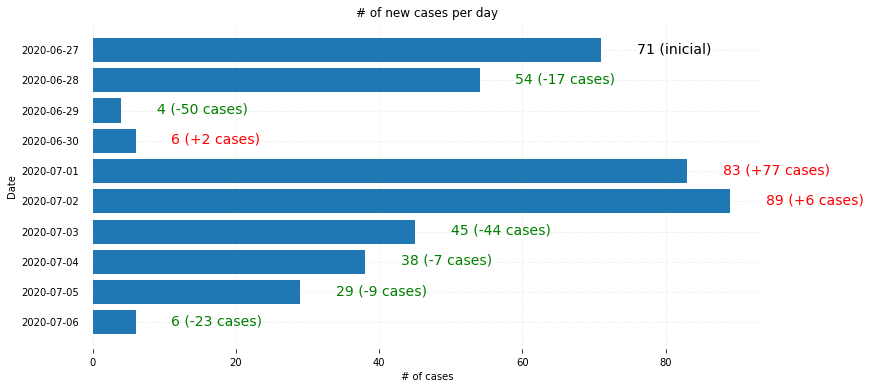

In [101]:
y_axis = days 
x_axis = bar_days
  
# Figure Size 
fig, ax = plt.subplots(figsize =(12, 6)) 
  
# Horizontal Bar Plot 
ax.barh(y_axis, x_axis) 
  
# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 

# Remove y ticks
ax.yaxis.set_ticks_position('none') 
  
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2) 
  
# Show at middle
ax.invert_yaxis() 
  
# Add annotation to bars
clr = 'black'
difa = 'inicial'
for i, j in zip(ax.patches, range(10)):
    if j > 0 :
        if diff[j-1] < 0:
            clr = 'green'
            difa = str(diff[j-1]) + ' cases'
        elif diff[j-1] > 0:
            clr = 'red'
            difa = '+' + str(diff[j-1]) + ' cases'
        else:
            clr = 'black'
    plt.text(i.get_width()+5, i.get_y()+0.5,  
             str(i.get_width()) + f' ({difa})', 
             fontsize = 14, fontweight ='normal', 
             color = clr) 
    
# Add Plot Title 
ax.set_title('# of new cases per day', loc ='center') 
ax.set_xlabel('# of cases')
ax.set_ylabel('Date')

#### 2.2.4 Plot the number of recovered cases per day (on the last 10 days).

In [102]:
rec_per_day = clean_df.drop(columns=['_idade', '_sexo', '_bairro', '_classificacao', '_tipo_teste'])

In [103]:
rec_per_day

,_conclusao,_dt_notificacao
680,Recuperado,20/03/2020
681,Recuperado,27/03/2020
67519,Recuperado,20/04/2020
67523,Recuperado,24/04/2020
67540,Recuperado,23/04/2020
...,...,...
108310,Recuperado,02/06/2020
108338,Recuperado,28/06/2020
108341,Recuperado,25/06/2020
108346,Recuperado,01/06/2020


In [104]:
rec_per_day['_dt_notificacao'] = pd.to_datetime(rec_per_day['_dt_notificacao'], dayfirst=True)

In [105]:
rec_per_day

,_conclusao,_dt_notificacao
680,Recuperado,2020-03-20
681,Recuperado,2020-03-27
67519,Recuperado,2020-04-20
67523,Recuperado,2020-04-24
67540,Recuperado,2020-04-23
...,...,...
108310,Recuperado,2020-06-02
108338,Recuperado,2020-06-28
108341,Recuperado,2020-06-25
108346,Recuperado,2020-06-01


In [106]:
rec_per_day_sorted = rec_per_day.sort_values(by='_dt_notificacao')

In [107]:
rec_per_day_sorted

,_conclusao,_dt_notificacao
107318,Recuperado,2020-01-30
77211,Recuperado,2020-02-16
89016,Recuperado,2020-03-09
68700,Recuperado,2020-03-13
75419,Recuperado,2020-03-14
...,...,...
108042,Óbito,2020-07-20
107433,Óbito,2020-07-24
108123,Óbito,2020-07-24
107461,Óbito,2020-07-30


In [108]:
ora_porra = rec_per_day_sorted[rec_per_day_sorted._conclusao == 'Recuperado'].groupby('_dt_notificacao').count()

In [109]:
ora_porra.tail(10)

,_conclusao
_dt_notificacao,
2020-06-27,4
2020-06-28,6
2020-06-29,83
2020-06-30,89
2020-07-01,45
2020-07-02,38
2020-07-03,29
2020-07-04,6
2020-07-05,9


In [110]:
aux = list(ora_porra.tail(10).values.flatten())

In [111]:
diff2 = [bar_days[i] - aux[i] for i in range(10)]
print(diff2)

[67, 48, -79, -83, 38, 51, 16, 32, 20, -26]


Text(0, 0.5, 'Date')

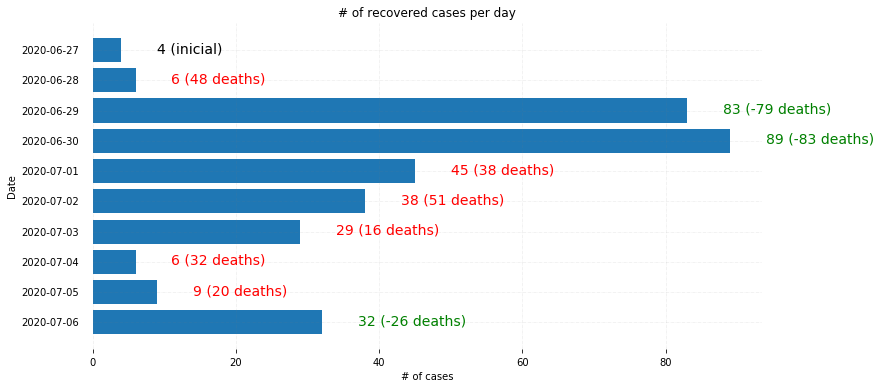

In [112]:
y_axis = days 
x_axis = aux
  
# Figure Size 
fig, ax = plt.subplots(figsize =(12, 6)) 
  
# Horizontal Bar Plot 
ax.barh(y_axis, x_axis) 
  
# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 

# Remove y ticks
ax.yaxis.set_ticks_position('none') 
  
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2) 
  
# Show at middle
ax.invert_yaxis() 
  
# Add annotation to bars
clr = 'black'
difa = 'inicial'
for i, j in zip(ax.patches, range(10)):
    if j > 0:    
        if diff2[j] > 0:
            clr = 'red'
            difa = str(diff2[j]) + ' deaths'
        elif diff2[j] <= 0:
            clr = 'green'
            difa = str(diff2[j]) + ' deaths'
        else:
            clr = 'black'
    plt.text(i.get_width()+5, i.get_y()+0.5,  
             str(i.get_width()) + f' ({difa})', 
             fontsize = 14, fontweight ='normal', 
             color = clr) 
    
# Add Plot Title 
ax.set_title('# of recovered cases per day', loc ='center') 
ax.set_xlabel('# of cases')
ax.set_ylabel('Date')

#### 2.2.5 Plot a histogram that shows the number of cases by age range (0-10 yo, 11-20 yo, ...).

In [113]:
cases_by_age = clean_df.drop(columns=['_bairro', '_dt_notificacao', '_tipo_teste'])

In [114]:
cases_by_age

,_idade,_sexo,_classificacao,_conclusao
680,25.0,F,Confirmado,Recuperado
681,41.0,F,Confirmado,Recuperado
67519,40.0,F,Confirmado,Recuperado
67523,50.0,M,Confirmado,Recuperado
67540,30.0,M,Confirmado,Recuperado
...,...,...,...,...
108310,70.0,F,Confirmado,Recuperado
108338,0.0,M,Confirmado,Recuperado
108341,14.0,F,Confirmado,Recuperado
108346,68.0,M,Confirmado,Recuperado


In [115]:
counter = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for x in cases_by_age['_idade'].values:
    if x in range(0, 10): counter[0] += 1
    if x in range(10, 20): counter[1] += 1
    if x in range(20, 30): counter[2] += 1
    if x in range(30, 40): counter[3] += 1
    if x in range(40, 50): counter[4] += 1
    if x in range(50, 60): counter[5] += 1
    if x in range(60, 70): counter[6] += 1
    if x in range(70, 80): counter[7] += 1
    if x in range(80, 90): counter[8] += 1
    if x in range(90, 100): counter[9] += 1
    if x in range(100, 200): counter[10] += 1
        
print(counter)

[141, 147, 891, 1681, 1900, 1074, 397, 128, 55, 8, 0]


In [116]:
perc_by_age = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in range(len(perc_by_age)):
    perc_by_age[i] = counter[i]/33925.0 * 100.0
    
print(perc_by_age)

[0.4156226971260133, 0.4333087693441415, 2.6263817243920413, 4.955047899778924, 5.600589535740604, 3.1658069270449523, 1.170228445099484, 0.37730287398673545, 0.16212232866617537, 0.023581429624170966, 0.0]


Text(0, 0.5, '% of cases')

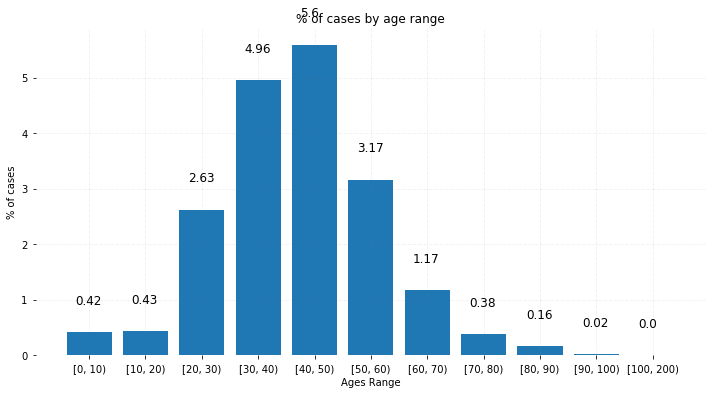

In [118]:
y_axis = perc_by_age
x_axis = ['[0, 10)', '[10, 20)', '[20, 30)', '[30, 40)', '[40, 50)', '[50, 60)', 
          '[60, 70)', '[70, 80)', '[80, 90)', '[90, 100)', '[100, 200)']
  
# Figure Size 
fig, ax = plt.subplots(figsize =(12, 6)) 
  
# Vertical Bar Plot 
ax.bar(x_axis, y_axis) 
  
# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
    
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 5) 
  
# Add x, y gridlines 
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2) 
  
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_x()+0.15, i.get_height()+0.5,
             str(round((i.get_height()), 2)), 
             fontsize = 12, fontweight ='normal', 
             color = 'black') 
    
# Add Plot Title 
ax.set_title('% of cases by age range', loc='center') 
ax.set_xlabel('Ages Range')
ax.set_ylabel('% of cases')

#### 2.2.6 Plot a graph that shows the cumulative cases alongside time.

In [119]:
alongside = days_group.values.flatten()

In [120]:
alongside

array([  1,   1,   1,   1,   2,   2,   4,   6,   1,   5,   3,   3,  13,
         8,  17,  14,  11,  23,  40,  40,  41,  14,  24,  17,  27,  25,
        37,  24,  23,  27,  14,  43,  24,  30,  31,  29,   7,  19,  38,
        13,  28,  27,  40,  10,  12,  66,  61,  45,  44,  21,  23,  39,
        88, 135, 130, 101, 118,  70,  31,  93, 247, 141, 172, 123,  31,
        22, 132, 176, 190, 208, 205,  53,  36, 152,  85, 210, 185, 138,
        24,  16, 119, 105,  50, 126, 110,  27,  14, 172, 123,  77,  10,
        15,  14,  13,  43,  95,  88,  57,  47,  18,  19,  87,  45,  45,
        71,  54,   4,   6,  83,  89,  45,  38,  29,   6,   9,  32,   1,
         1,   2,   1,   1], dtype=int64)

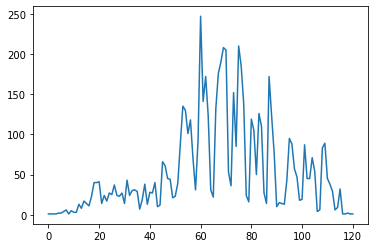

In [121]:
plt.plot(alongside)

In [122]:
x = list(alongside)
y = [x[0]]

for i in range(1,len(x)):
    y.append(x[i] + y[i-1])
        
print(y)

[1, 2, 3, 4, 6, 8, 12, 18, 19, 24, 27, 30, 43, 51, 68, 82, 93, 116, 156, 196, 237, 251, 275, 292, 319, 344, 381, 405, 428, 455, 469, 512, 536, 566, 597, 626, 633, 652, 690, 703, 731, 758, 798, 808, 820, 886, 947, 992, 1036, 1057, 1080, 1119, 1207, 1342, 1472, 1573, 1691, 1761, 1792, 1885, 2132, 2273, 2445, 2568, 2599, 2621, 2753, 2929, 3119, 3327, 3532, 3585, 3621, 3773, 3858, 4068, 4253, 4391, 4415, 4431, 4550, 4655, 4705, 4831, 4941, 4968, 4982, 5154, 5277, 5354, 5364, 5379, 5393, 5406, 5449, 5544, 5632, 5689, 5736, 5754, 5773, 5860, 5905, 5950, 6021, 6075, 6079, 6085, 6168, 6257, 6302, 6340, 6369, 6375, 6384, 6416, 6417, 6418, 6420, 6421, 6422]


Text(0.5, 1.0, 'Cumulative cases per day')

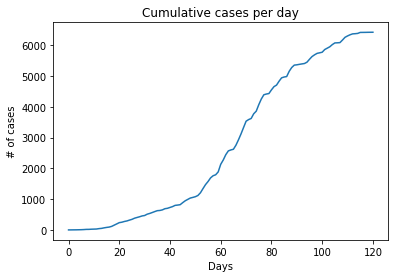

In [123]:
plt.plot(y)
plt.xlabel("Days")
plt.ylabel("# of cases")
plt.title("Cumulative cases per day")

#### 2.2.7 Plot a scatterplot that shows the age versus total number of cases. There exist any tendency?

In [124]:
age_cases.index

Float64Index([ 0.0,  1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0,
              11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0,
              22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0,
              33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0,
              44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0,
              55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0,
              66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0,
              77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0,
              88.0, 89.0, 90.0, 92.0, 93.0, 94.0, 96.0, 97.0, 99.0],
             dtype='float64', name='_idade')

In [125]:
age_cases.values.transpose()[0]

array([ 48,  19,  11,  14,  10,  11,   6,  11,   5,   6,   8,   5,   9,
        12,  15,  14,  15,  27,  26,  16,  43,  50,  55,  70,  92, 112,
        95, 114, 134, 126, 123, 145, 155, 149, 149, 170, 179, 185, 213,
       213, 215, 205, 202, 198, 196, 192, 212, 170, 169, 141, 143, 119,
       128, 135, 113, 108,  92,  92,  76,  68,  64,  49,  49,  50,  32,
        43,  33,  31,  24,  22,  20,  19,  17,  14,   8,  12,  15,   7,
        10,   6,   8,  10,   8,   2,   7,   5,   4,   4,   3,   4,   1,
         2,   1,   1,   1,   1,   1], dtype=int64)

Text(0, 0.5, '# of confirmed cases')

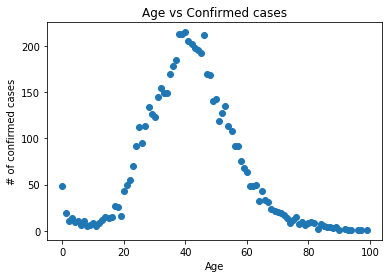

In [126]:
plt.scatter(age_cases.index, age_cases.values.transpose()[0])
plt.title("Age vs Confirmed cases")
plt.xlabel("Age")
plt.ylabel("# of confirmed cases")